## Laboratorium 11: Statystyki i wykresy z pliku covid.txt

   Najpierw zaimportujmy potrzebne biblioteki oraz sam plik.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from datetime import datetime

FILENAME_WINDOWS = 'C:\\Uczelnia\\Semestr4\\Jezyki Skryptowe\\laby\\lab6JezykiS\\covid.txt'

df = pd.read_csv(FILENAME_WINDOWS, delimiter='\t')

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,25.11.2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,"7,1999829"
1,24.11.2020,24,11,2020,246,17,Afghanistan,AF,AFG,38041757.0,Asia,"6,71367519"
2,23.11.2020,23,11,2020,252,8,Afghanistan,AF,AFG,38041757.0,Asia,"6,655844"
3,22.11.2020,22,11,2020,154,12,Afghanistan,AF,AFG,38041757.0,Asia,"6,20370926"
4,21.11.2020,21,11,2020,232,25,Afghanistan,AF,AFG,38041757.0,Asia,"6,13010593"


### Zadanie 1

 Funkcja generująca wykres z zadanego przedziału czasu, dla wybranego kraju lub kontynentu, zgonów lub przypadków.

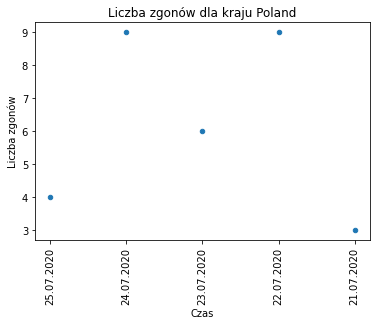

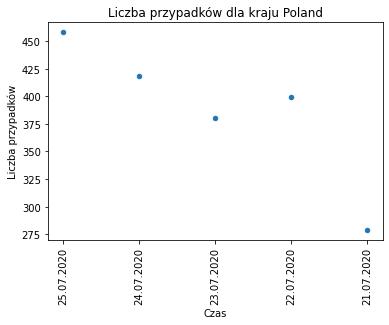

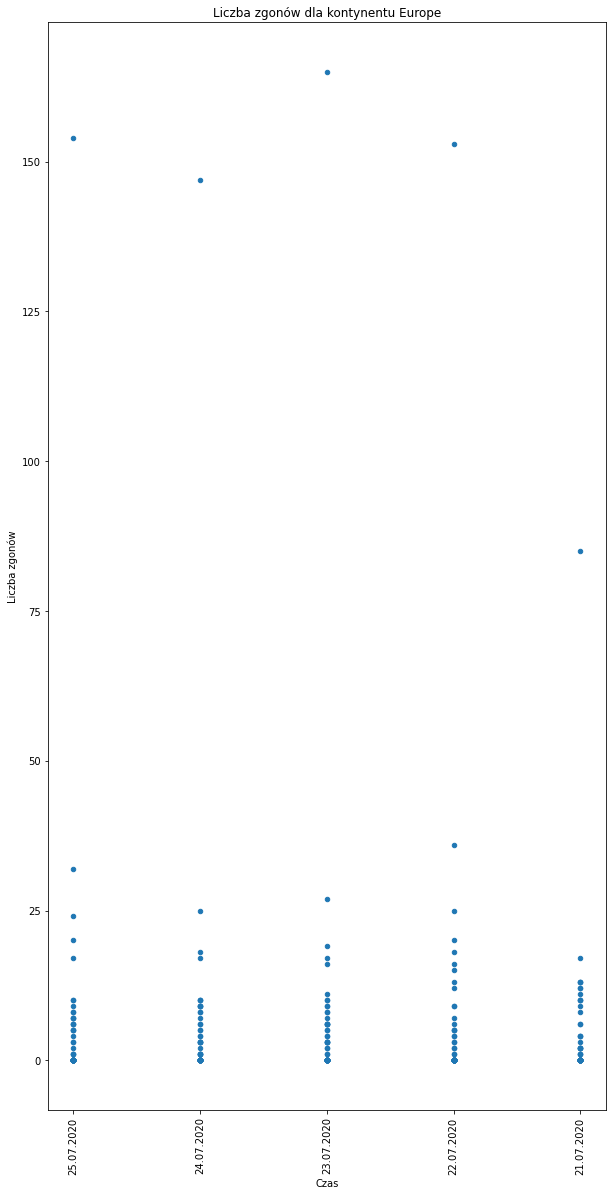

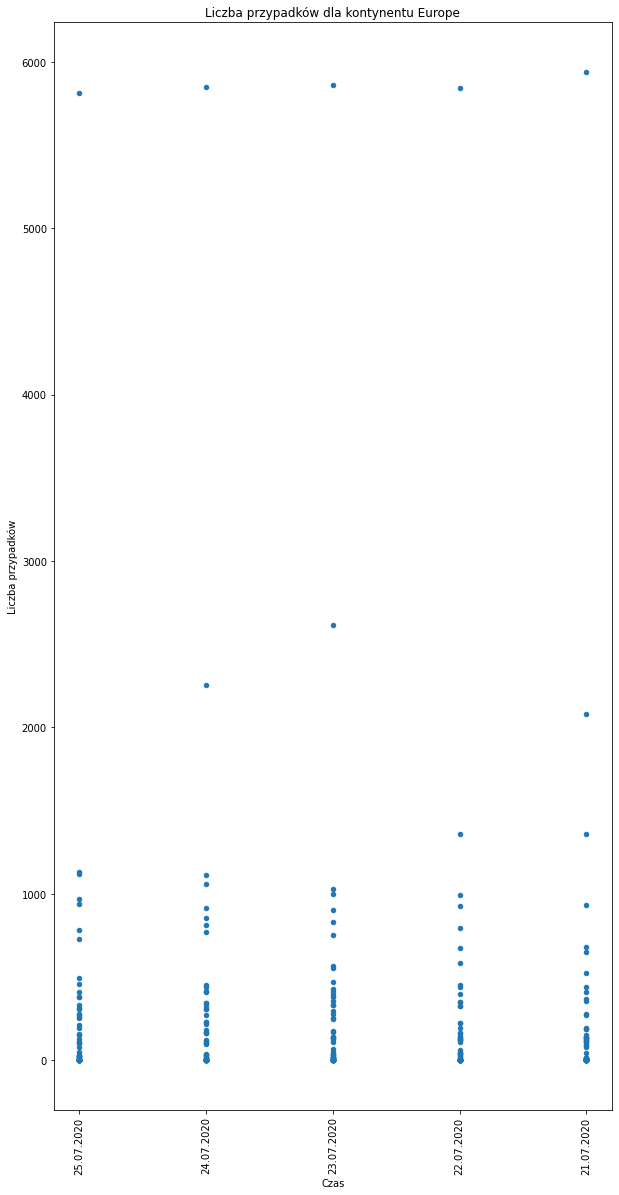

In [48]:
# Przedział czasowy
STARTDATE = '2020.07.21'
ENDDATE = '2020.07.25'

# funkcja tnąca dane, wybiera te które mieszczą się w przedziale
def take_data_from_dates(start, end, data):
    return data.loc[(
        (pd.to_datetime(data['dateRep'], errors='coerce', infer_datetime_format = True) >= start) & 
        (pd.to_datetime(data['dateRep'], errors='coerce', infer_datetime_format = True) <= end)
    )]

# funkcja wybeirająca podane kolumny
def take_deaths_or_cases(death_or_cases, data):
    if death_or_cases == 'd':
        return data.loc[:, ['dateRep', 'deaths', 'countriesAndTerritories']]
    elif death_or_cases == 'c':
        return data.loc[:, ['dateRep', 'cases', 'countriesAndTerritories']]
    else:
        raise Exception('Wpisz d żeby zobaczyć liczbę zgonów lub wpisz c żeby zobaczyć liczbę przypadków')

# fukncja główna
def draw_scatter_plot(start_date, end_date, country_or_continent, death_or_cases):
    # trafiliśmy na kraj
    if country_or_continent in df['countriesAndTerritories'].values:
        
        # tniemy dane wybierając to co chcemy
        country = country_or_continent
        data_country = df.loc[df['countriesAndTerritories'] == country]
        data_dates = take_data_from_dates(start_date, end_date, data_country)
        data_values = take_deaths_or_cases(death_or_cases, data_dates)

        # rysujemy
        if death_or_cases == 'd':
            scatter_plot = data_values.plot(x='dateRep', y='deaths', kind='scatter', title='Liczba zgonów dla kraju %s' % country)
            plt.xticks(rotation=90)
            scatter_plot.set_xlabel('Czas')
            scatter_plot.set_ylabel('Liczba zgonów')
            plt.show()
        else:
            scatter_plot = data_values.plot(x='dateRep', y='cases', kind='scatter', title='Liczba przypadków dla kraju %s' % country)
            plt.xticks(rotation=90)
            scatter_plot.set_xlabel('Czas')
            scatter_plot.set_ylabel('Liczba przypadków')
            plt.show()
        
    # trafiliśmy na kontynent    
    elif country_or_continent in df['continentExp'].values:
        
        # tniemy dane wybierając to co chcemy
        continent = country_or_continent
        data_continent = df.loc[df['continentExp'] == continent]
        data_dates = take_data_from_dates(start_date, end_date, data_continent)
        data_values = take_deaths_or_cases(death_or_cases, data_dates)

        # rysujemy
        if death_or_cases == 'd':
            scatter_plot = data_values.plot(x='dateRep', y='deaths', figsize = (10,20), kind='scatter', title='Liczba zgonów dla kontynentu %s' % continent)
            plt.xticks(rotation=90)
            scatter_plot.set_xlabel('Czas')
            scatter_plot.set_ylabel('Liczba zgonów')
            plt.show()
        else:
            scatter_plot = data_values.plot(x='dateRep', y='cases', figsize = (10,20), kind='scatter', title='Liczba przypadków dla kontynentu %s' % continent)
            plt.xticks(rotation=90)
            scatter_plot.set_xlabel('Czas')
            scatter_plot.set_ylabel('Liczba przypadków')
            plt.show()
        
    # błędna nazwa
    else:
        raise Exception('Podana błędna nazwa kraju lub kontynentu: %s' % country_or_continent)
    
draw_scatter_plot(STARTDATE, ENDDATE, 'Poland', 'd')
draw_scatter_plot(STARTDATE, ENDDATE, 'Poland', 'c')
draw_scatter_plot(STARTDATE, ENDDATE, 'Europe', 'd')
draw_scatter_plot(STARTDATE, ENDDATE, 'Europe', 'c')

### Zadanie 2

   Identyczny wykres jak w zadaniu pierwszym, tylko skumulowany, tzn. dodajemy na nim sumę.

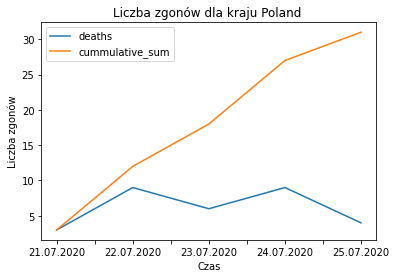

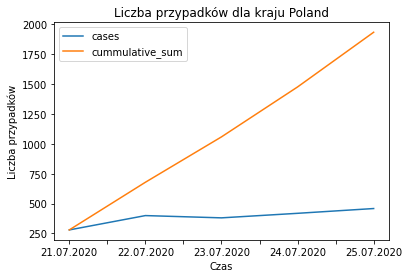

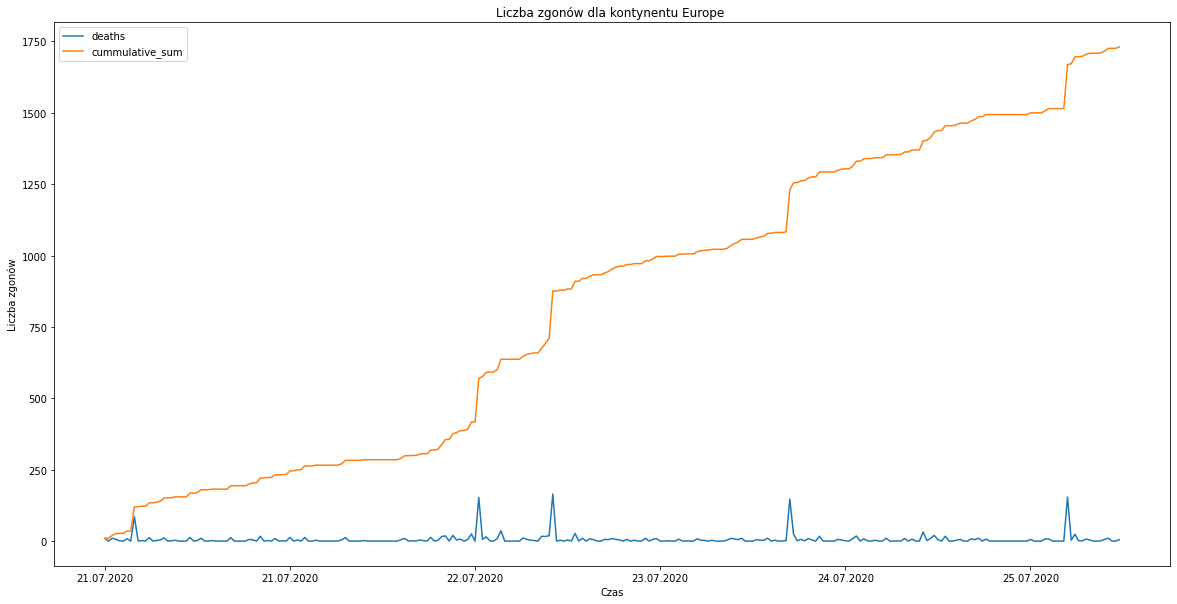

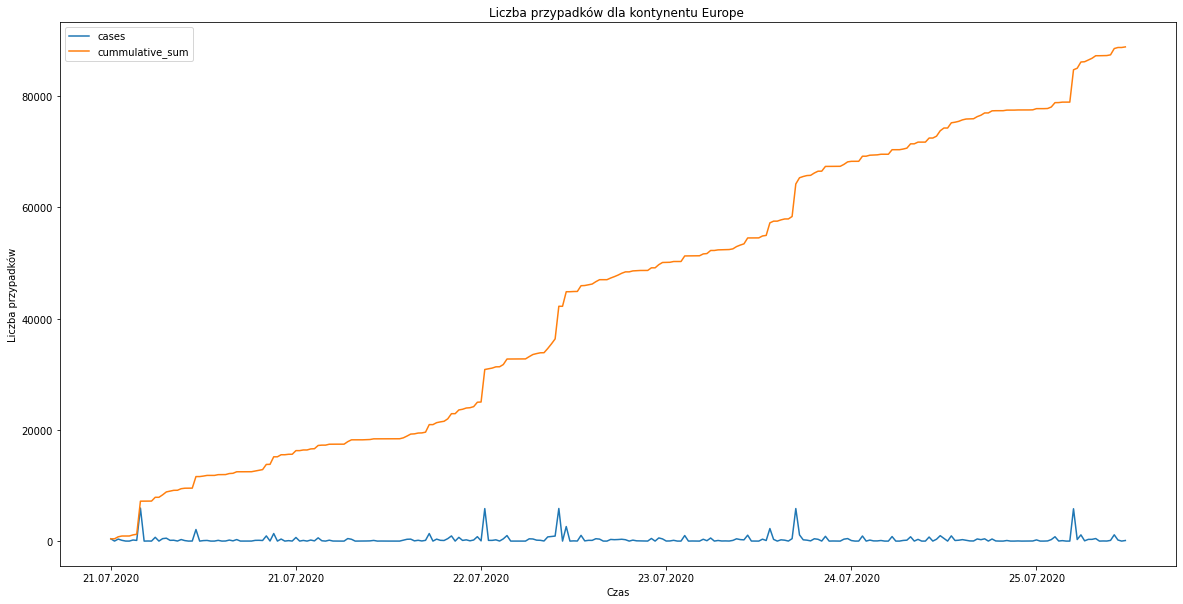

In [49]:
# fukncja główna
def draw_cummulative_plot(start_date, end_date, country_or_continent, death_or_cases):
    # trafiliśmy na kraj
    if country_or_continent in df['countriesAndTerritories'].values:
        
        # tniemy dane wybierając to co chcemy
        country = country_or_continent
        data_country = df.loc[df['countriesAndTerritories'] == country]
        data_dates = take_data_from_dates(start_date, end_date, data_country)
        data_values = take_deaths_or_cases(death_or_cases, data_dates)
        data_values.set_index('dateRep', inplace=True)
        data_values.sort_values(by=['dateRep'], inplace=True, ascending=True)

        # rysujemy
        if death_or_cases == 'd':
            data_values['cummulative_sum'] = data_values['deaths'].cumsum()
            dp = data_values.plot()
            dp.set_xlabel('Czas')
            dp.set_ylabel('Liczba zgonów')
            dp.set_title('Liczba zgonów dla kraju %s ' % country)
            
        else:
            data_values['cummulative_sum'] = data_values['cases'].cumsum()
            dp = data_values.plot()
            dp.set_xlabel('Czas')
            dp.set_ylabel('Liczba przypadków')
            dp.set_title('Liczba przypadków dla kraju %s' % country)

        plt.show()
        
    # trafiliśmy na kontynent    
    elif country_or_continent in df['continentExp'].values:
        
        # tniemy dane wybierając to co chcemy
        continent = country_or_continent
        data_continent = df.loc[df['continentExp'] == continent]
        data_dates = take_data_from_dates(start_date, end_date, data_continent)
        data_values = take_deaths_or_cases(death_or_cases, data_dates)
        data_values.set_index('dateRep', inplace=True)
        data_values.sort_values(by=['dateRep'], inplace=True, ascending=True)
        
        # rysujemy
        if death_or_cases == 'd':
            data_values['cummulative_sum'] = data_values['deaths'].cumsum()
            dp = data_values.plot(figsize=(20, 10))
            dp.set_xlabel('Czas')
            dp.set_ylabel('Liczba zgonów')
            dp.set_title('Liczba zgonów dla kontynentu %s ' % continent)
        else:
            data_values['cummulative_sum'] = data_values['cases'].cumsum()
            dp = data_values.plot(figsize=(20, 10))
            dp.set_xlabel('Czas')
            dp.set_ylabel('Liczba przypadków')
            dp.set_title('Liczba przypadków dla kontynentu %s ' % continent)
            
        plt.show()
            
    # błędna nazwa
    else:
        raise Exception('Podana błędna nazwa kraju lub kontynentu %s' % country_or_continent)
    
    
draw_cummulative_plot(STARTDATE, ENDDATE, 'Poland', 'd')
draw_cummulative_plot(STARTDATE, ENDDATE, 'Poland', 'c')
draw_cummulative_plot(STARTDATE, ENDDATE, 'Europe', 'd')
draw_cummulative_plot(STARTDATE, ENDDATE, 'Europe', 'c')

### Zadanie 3

   Histogram liczby przypadków lub zgonów dla danego kraju i dla danej ilości przedziałów.

Histogram zgonów dla kraju Poland
Maksymalna wartość w zbiorze danych: 637
Minimalna wartość w zbiorze danych: 0


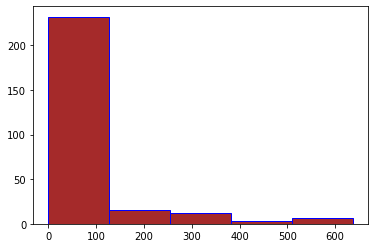

Histogram przypadków dla kraju Poland
Maksymalna wartość w zbiorze danych: 32733
Minimalna wartość w zbiorze danych: 0


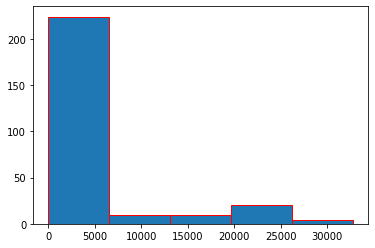

In [50]:
def draw_histogram(country, is_d, bins_u):
    if country in df['countriesAndTerritories'].values:
        if is_d:
            data_c = df[df['countriesAndTerritories'] == country]
            
            print('Histogram zgonów dla kraju %s' % country)
            print('Maksymalna wartość w zbiorze danych: %s' % data_c['deaths'].max())
            print('Minimalna wartość w zbiorze danych: %s' % data_c['deaths'].min())
        
            plt.hist(data_c['deaths'], edgecolor='blue', color='brown', bins=bins_u)
            plt.show()
        else:
            data_c = df[df['countriesAndTerritories'] == country]
            
            print('Histogram przypadków dla kraju %s' % country)
            print('Maksymalna wartość w zbiorze danych: %s' % data_c['cases'].max())
            print('Minimalna wartość w zbiorze danych: %s' % data_c['cases'].min())
        
            plt.hist(data_c['cases'], edgecolor='red', bins=bins_u)
            plt.show()
    else:
        raise Exception("Błędna nazwa kraju")
        
draw_histogram('Poland', True, 5)
draw_histogram('Poland', False, 5)



   Rozmiar jednego koszyka jest równy: (maksymalna wartość w zbiorze danych - minimalna wartość w zbiorze danych) / ilość koszyków. Zobaczmy czy zgadza się to z naszymi rysunkami.

Histogram z danymi zgonów: szerokość 1 koszyka = (637 + 0) / 5 = 127

Histogram z danymi przypadków: szerokość 1 koszyka = (32733 + 0) / 5 = 6547

### Zadanie 4

   Generator n kolejnych dni i liczby przypadków lub zgonów dla podanego kraju.

Ponieważ musimy przy każdym uruchomieniu podawać kolejne dni nie możemy utworzyć generatora lokalnie w funkcji, ale musimy to zrobić globalnie. Ponadto nie wiemy czy użytkownik wybierze liczbę zgonów czy przypadków, dlatego utwórzmy oba generatory zanim stworzymy metodę zwracającą dni. 

In [51]:
country = 'Poland'

file_data = 'C:\\Uczelnia\\Semestr4\\Jezyki Skryptowe\\laby\\lab6JezykiS\\covid.txt'
lines = (line for line in open(file_data, encoding='utf8'))

list_line = (s.rstrip().split('\t') for s in lines)
cols = next(list_line)
dicts = (dict(zip(cols, data)) for data in list_line)

founded_deaths = (
        (dictionary['dateRep'], int(dictionary['deaths']))
        for dictionary in dicts
        if dictionary['countriesAndTerritories'] == country
        )

founded_cases = (
        (dictionary['dateRep'], int(dictionary['cases']))
        for dictionary in dicts
        if dictionary['countriesAndTerritories'] == country
        )

        
def take_tuple(n, is_d):
    result = ()
    if is_d:
        for i in range(0, n):
            result = result + (next(founded_deaths), )
    else:
        for i in range(0, n):
            result = result + (next(founded_cases), )
    
    return result


   Skoro metody są gotowe spróbujmy je przetestować, poszukajmy piętnastu kolejnych dni dla Polski dla przypadków oraz zgonów. Zrobimy to w pętli pięć iteracji po trzy krotki w każdej.

In [52]:
print('Piętnaście kolejnych dni dla Polski: (zgony)')    
for i in range (0, 5):
    print(take_tuple(3, True))

Piętnaście kolejnych dni dla Polski: (zgony)
(('25.11.2020', 540), ('24.11.2020', 156), ('23.11.2020', 330))
(('22.11.2020', 574), ('21.11.2020', 626), ('20.11.2020', 637))
(('19.11.2020', 603), ('18.11.2020', 357), ('17.11.2020', 143))
(('16.11.2020', 303), ('15.11.2020', 546), ('14.11.2020', 419))
(('13.11.2020', 275), ('12.11.2020', 430), ('11.11.2020', 330))


In [53]:
print('Piętnaście kolejnych dni dla Polski: (przypadki)')    
for i in range (0, 5):
    print(take_tuple(3, False))

Piętnaście kolejnych dni dla Polski: (przypadki)
(('10.11.2020', 21713), ('09.11.2020', 24785), ('08.11.2020', 27875))
(('07.11.2020', 27086), ('06.11.2020', 27143), ('05.11.2020', 24692))
(('04.11.2020', 19364), ('03.11.2020', 15578), ('02.11.2020', 17171))
(('01.11.2020', 21897), ('31.10.2020', 21629), ('30.10.2020', 20156))
(('29.10.2020', 18820), ('28.10.2020', 16300), ('27.10.2020', 10241))
